In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statistics
%matplotlib inline

In [2]:
df=pd.read_excel('customer_retention_dataset.xlsx',engine='openpyxl')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


### EDA

In [3]:
df.shape

(269, 71)

In [4]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
columns=['gender','age','city','pinCode','shopping_since','shopping_frequency_1year','internet_type','device',
           'screen_size','OS', 'browser','1_channel','Access','time_spent','prefered_payment_mode',
           'cancel_shopping','cancel_reason','content_readability','similar_product',
           'seller_info','product_info_clarity','navigation_ease','web_speed','UI',
           'UI_payment_mode','trust_process','customer_support','privacy_garauntee',
           'Channel_Diversity','benefit','satisfaction','convenient','Return/Replacement','loyalty_program',
         'info_satisfaction','UI_Satisfaction','net_benefit','trust','product_category','relevant_info',
         'Savings','patronizing','experience','Status','gratification','role','Worthy','platform_Used',
         'convinient_accessibility','Appealing_UI','product_diversity','product_info','performance_platform','reliable_UI',
         'navigation','payment_mode_availability','speed_delivery','customer_privacy','financial_security','trust_worthiness',
        'multi_channel','slow_login_time','slow_display_time','late_price_announcement','slow_load_time','limited_payment_mode',
         'longer_delivery_period','frequent_UI_change','frequent_page_disruption','UI_efficiency','platform_recommend']
df.columns = columns
pd.set_option('max_columns', None)
df.head()

,gender,age,city,pinCode,shopping_since,shopping_frequency_1year,internet_type,device,screen_size,OS,browser,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,Google chrome,Search Engine,Via application,more than 15 mins,Credit/Debit cards,Very frequently,Promo code not applicable,Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),indifferent (3),indifferent (3),indifferent (3),Strongly agree (5),Strongly agree (5),Strongly agree (5),"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,Google chrome,Search Engine,Via application,11-15 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Promo code not applicable,Strongly agree (5),Agree (4),Agree (4),Agree (4),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Agree (4),indifferent (3),in

#### drop columns which do not fit relevant to analyze retention or activation rate: screen size,browser
drop column pincode as city name is already specified

In [6]:
df=df.drop(['pinCode','screen_size','browser'],axis=1)
df.head(1)

,gender,age,city,shopping_since,shopping_frequency_1year,internet_type,device,OS,1_channel,Access,time_spent,prefered_payment_mode,cancel_shopping,cancel_reason,content_readability,similar_product,seller_info,product_info_clarity,navigation_ease,web_speed,UI,UI_payment_mode,trust_process,customer_support,privacy_garauntee,Channel_Diversity,benefit,satisfaction,convenient,Return/Replacement,loyalty_program,info_satisfaction,UI_Satisfaction,net_benefit,trust,product_category,relevant_info,Savings,patronizing,experience,Status,gratification,role,Worthy,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,Male,31-40 years,Delhi,Above 4 years,31-40 times,Dial-up,Desktop,Window/windows Mobile,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Agree (4),indifferent (3),Strongly agree (5),Agree (4),Strongly agree (5),indifferent (3),indifferent (3),Disagree (2),indifferent (3),Agree (4),Agree (4),Strongly agree (5),Agree (4),Strongly agree (5),"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   gender                     269 non-null    object
 1   age                        269 non-null    object
 2   city                       269 non-null    object
 3   shopping_since             269 non-null    object
 4   shopping_frequency_1year   269 non-null    object
 5   internet_type              269 non-null    object
 6   device                     269 non-null    object
 7   OS                         269 non-null    object
 8   1_channel                  269 non-null    object
 9   Access                     269 non-null    object
 10  time_spent                 269 non-null    object
 11  prefered_payment_mode      269 non-null    object
 12  cancel_shopping            269 non-null    object
 13  cancel_reason              269 non-null    object
 14  content_re

In [8]:
pd.set_option('display.max_rows',None)

In [9]:
df.isnull().sum()

gender                       0
age                          0
city                         0
shopping_since               0
shopping_frequency_1year     0
internet_type                0
device                       0
OS                           0
1_channel                    0
Access                       0
time_spent                   0
prefered_payment_mode        0
cancel_shopping              0
cancel_reason                0
content_readability          0
similar_product              0
seller_info                  0
product_info_clarity         0
navigation_ease              0
web_speed                    0
UI                           0
UI_payment_mode              0
trust_process                0
customer_support             0
privacy_garauntee            0
Channel_Diversity            0
benefit                      0
satisfaction                 0
convenient                   0
Return/Replacement           0
loyalty_program              0
info_satisfaction            0
UI_Satis

Female    181
Male       88
Name: gender, dtype: int64

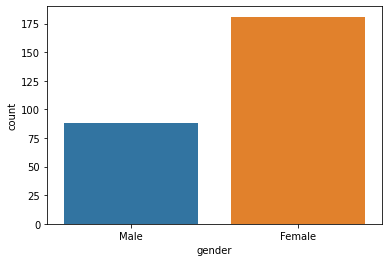

In [10]:
sns.countplot(x="gender",data=df)
df["gender"].value_counts()

##### The number of female respondents is higher than male respondents so main goal for customer activation should be concentrated to male population

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64

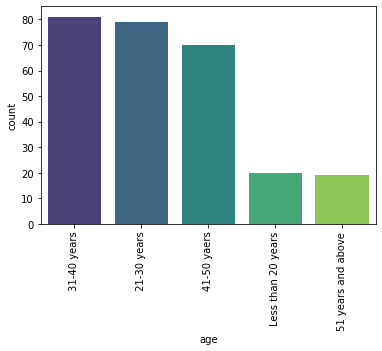

In [11]:
sns.countplot(x="age",data=df,palette = 'viridis')
plt.xticks(rotation = 90)
df["age"].value_counts()

##### most of the participants are of the age 21 to 50, where we received highest number of the customer activation from the people whose age is 31 to 40.

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: city, dtype: int64

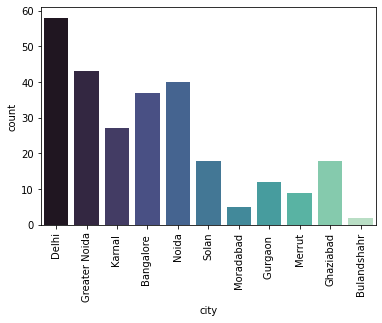

In [12]:
sns.countplot(x="city",data=df,palette = 'mako')
plt.xticks(rotation = 90)
df["city"].value_counts()

##### Delhi has the highest number of customers who are involved in online shopping followed by Greater Noida, Bangalore, and Noida.

Moradabad, Bulandshahr have very few customers so try to enhance sales in those areas.

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shopping_since, dtype: int64

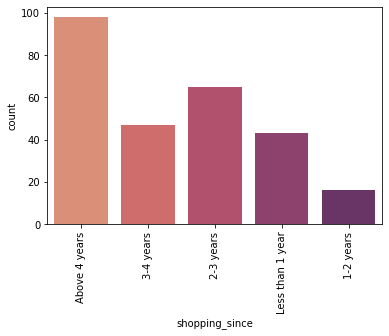

In [13]:
sns.countplot(x="shopping_since",data=df,palette = 'flare')
plt.xticks(rotation = 90)
df["shopping_since"].value_counts()

##### Most of the regular customers have been shopping for more than 4 years(Customer Activation & Retentaion rate)
Need to provide best services to customers who have recently been shopping for less than 1 year for better customer retention

In [14]:
df["shopping_frequency_1year"].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: shopping_frequency_1year, dtype: int64

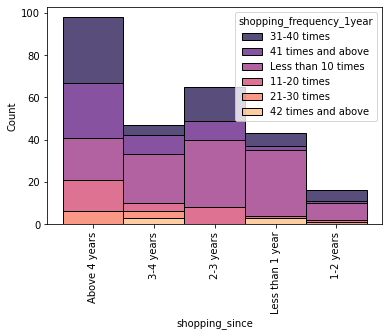

In [15]:
sns.histplot(x = "shopping_since",hue= 'shopping_frequency_1year', data = df, multiple="stack", palette = 'magma')
plt.xticks(rotation = 90)
plt.show()

##### The shopping frequency increases with increse in the length of shopping experience.
If we check for the people who were shopping since 1-2 years there was lesser number of orders overall and 
most of them ordered less than 10 times which means we need better customer activation for this category.

In [16]:
df['internet_type']=df['internet_type'].str.replace('Mobile Internet','Mobile internet')

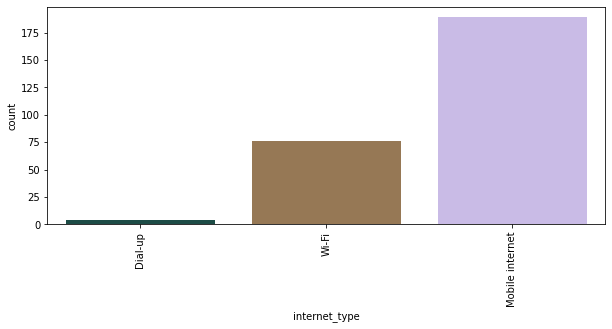

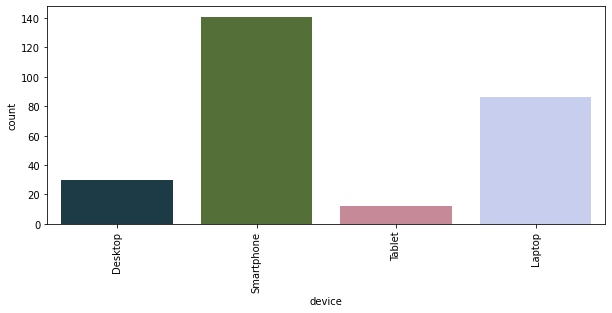

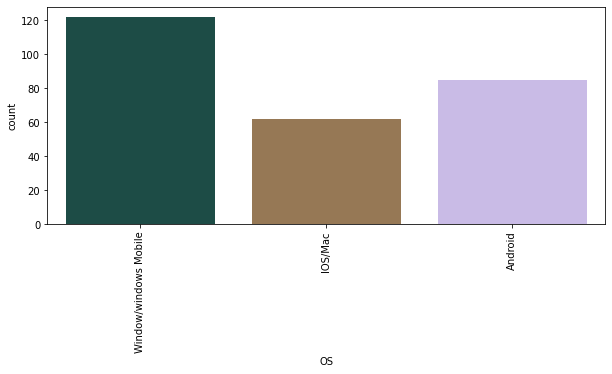

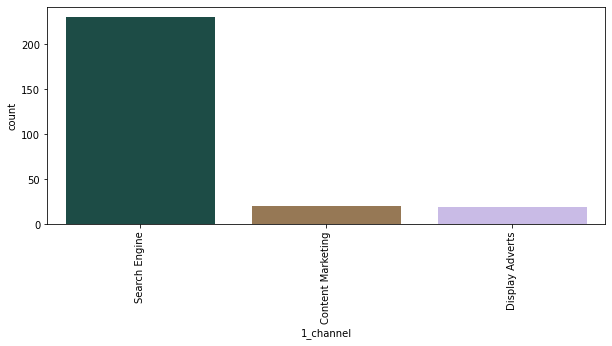

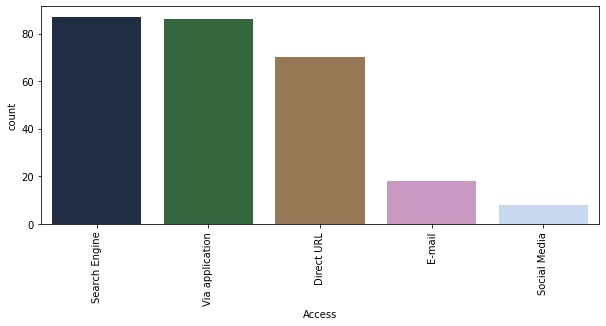

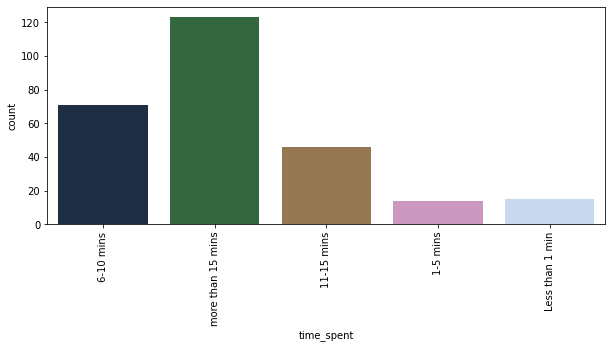

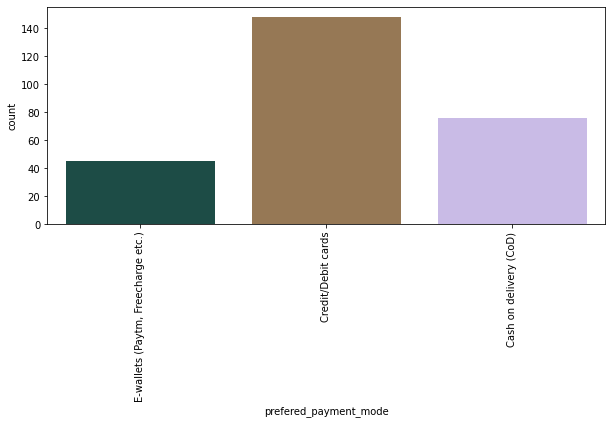

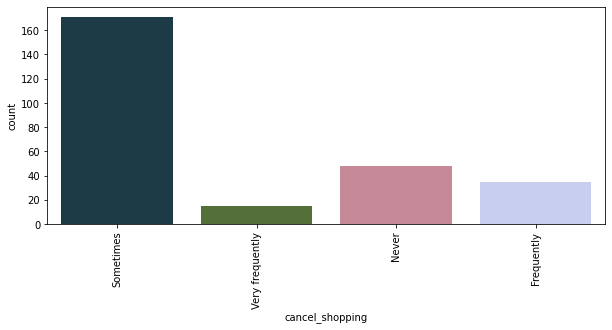

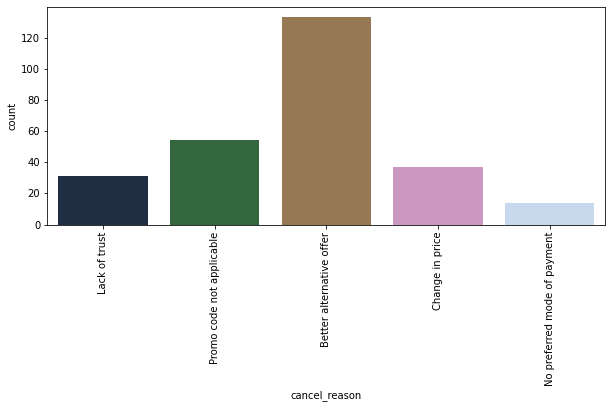

In [17]:
for i in df.columns[5:14]:    
    plt.figure(figsize=(10,4))
    sns.countplot(df[i],palette='cubehelix')
    plt.xticks(rotation=90)

Based on the internet type - most of the customers are using "mobile internet" for online shopping. While "Dial-up" is the rarest option.
Based on the device used - "Smartphone & Laptop" are mostly used for online shopping.
Based on OS - Customers mostly use Windows/windows mobile , followed by Android and IOS/Mac.
Channels used - "Search engine" helps the most for channeling the customers towards online store.
Rather than E-mails(sent by store) or Social Media platform, customers are using again Search Engine, or they direct use the application or use url to go to their prefered store.
Exploration Time - Most of the customers are taking more than 15 minute time before making any purchase.
Preferred Payment Option - More Customers are using Credit/Debit cards followed by CoD , E-Wallets.
Decision of abandoning -There are some  cases in which customers abandon the items because they are getting better alternative offers followed by change in price or promo code not applicable.

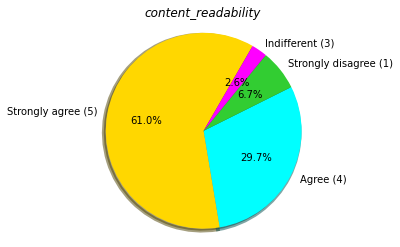

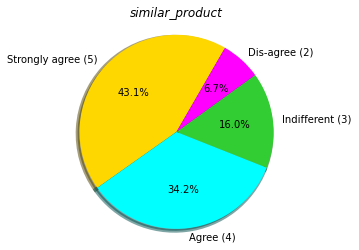

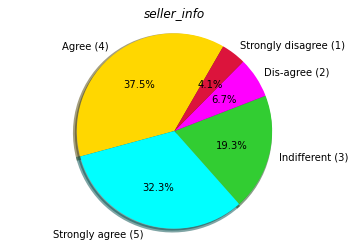

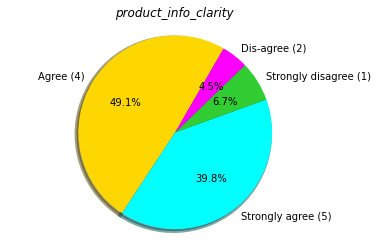

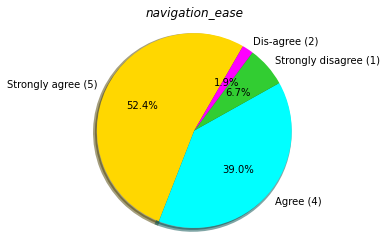

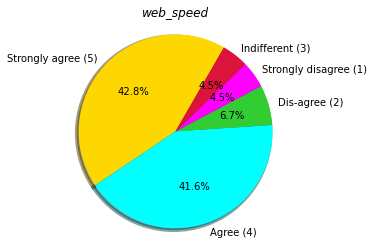

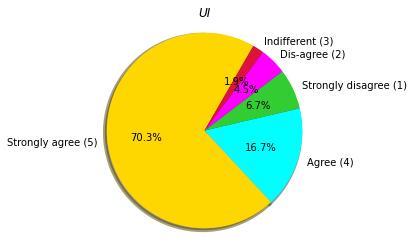

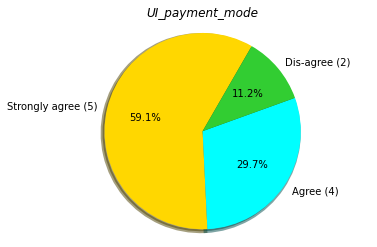

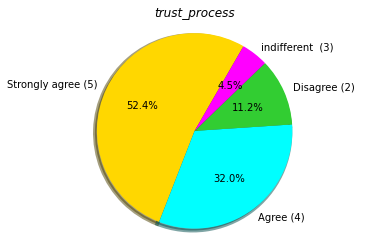

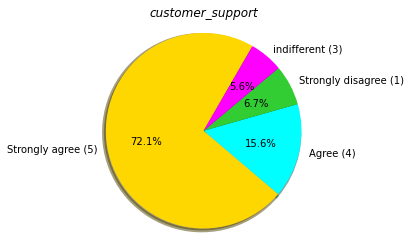

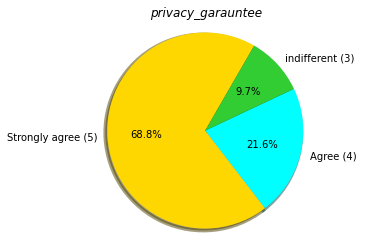

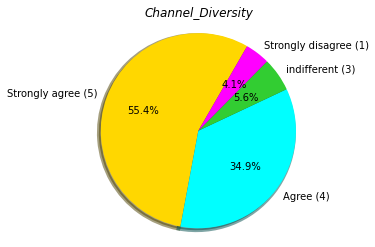

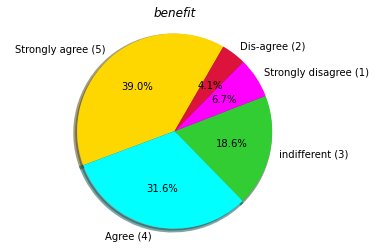

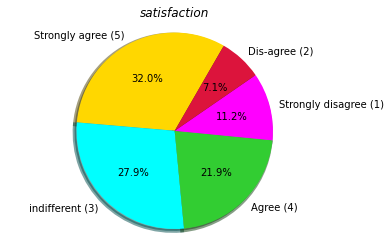

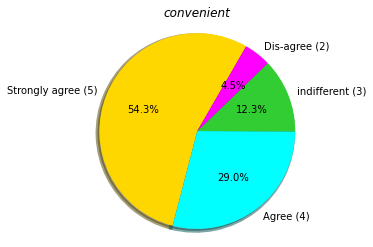

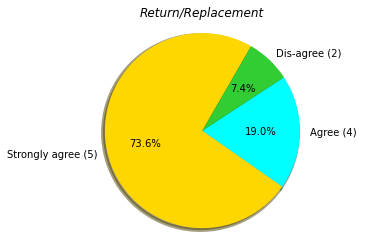

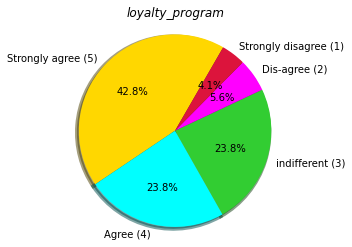

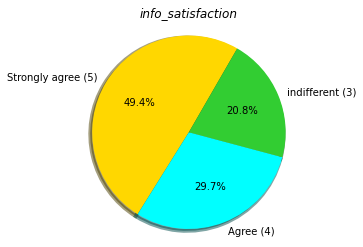

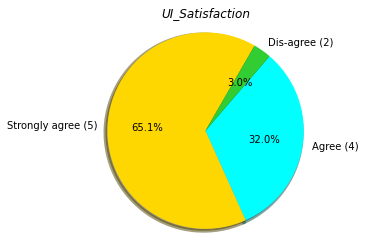

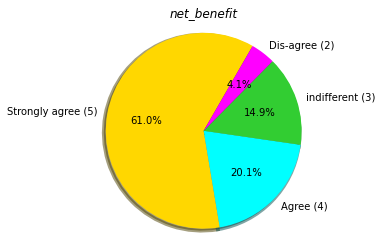

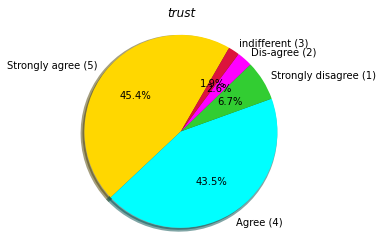

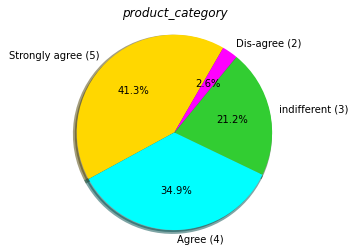

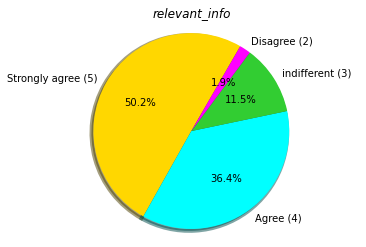

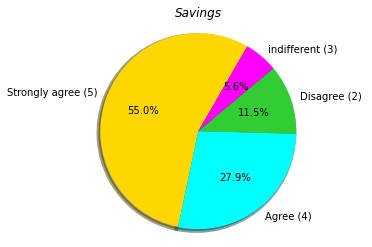

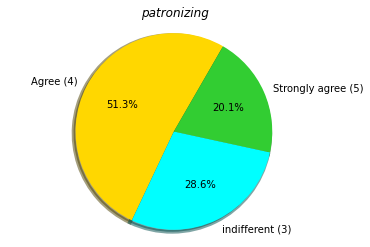

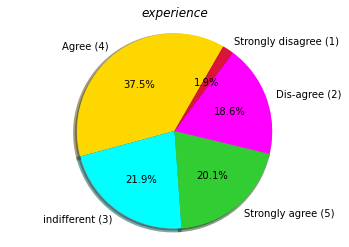

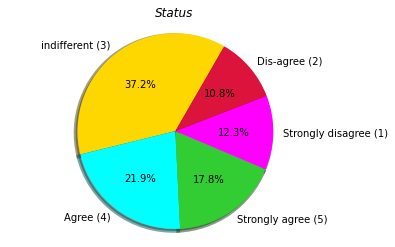

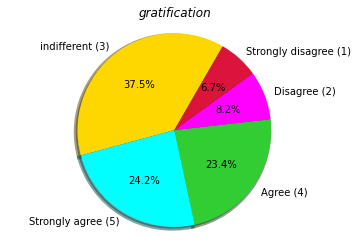

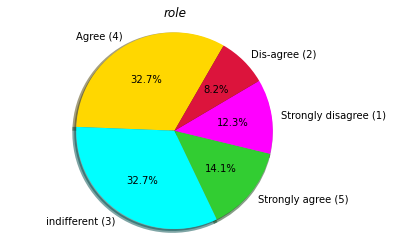

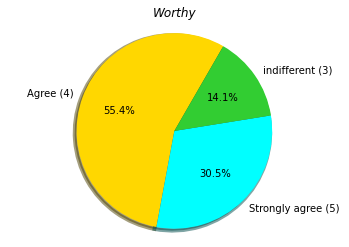

In [18]:
for i in df.columns[14:44]:
    plt.subplots()
    plt.pie(x=df[i].value_counts(),labels=df[i].value_counts().index,data=df,shadow=True, startangle=60,autopct='%1.1f%%',
                colors=['gold', 'cyan','limegreen', 'magenta', 'crimson'],wedgeprops = {'linewidth': 3.8})
    plt.setp(plt.title(i),style='italic')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Conditions where customers are in favour of "Strongly Agreement or Agree" -
a) The content readablity of the website is extremely good.
b) Information on similar product is good for product comparision.
c) Information on listed seller is better for purchase decision.
d) All relevant information on listed products is stated clearly.
e) Ease of navigation in extermely good.
f) Loading and processing speed of website is best.
g) UI is very user friendly.
h) Payment methods are very convenient.
i) Trust that the online retail store will fulfill its part of the transaction at the stipulated time.
j). Customer Support on this websites are very good.
k). Privacy of the customer is strongly preserved.
l). Responsiveness, availability of several communication channels (email,online rep, twitter, phone etc).
m). Online shopping gives monetary benefits and discounts.
n). Satisfaction is derived from shopping online.
o). Shopping online is convenient and flexible.

In [19]:
websites = df.iloc[:,44:]
websites

,platform_Used,convinient_accessibility,Appealing_UI,product_diversity,product_info,performance_platform,reliable_UI,navigation,payment_mode_availability,speed_delivery,customer_privacy,financial_security,trust_worthiness,multi_channel,slow_login_time,slow_display_time,late_price_announcement,slow_load_time,limited_payment_mode,longer_delivery_period,frequent_UI_change,frequent_page_disruption,UI_efficiency,platform_recommend
0,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com,Flipkart.com,Snapdeal.com,Snapdeal.com,Paytm.com,Paytm.com,Patym.com,Amazon.in,Amazon.in,Amazon.in,Flipkart.com,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com","Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com",Myntra.com,"Amazon.com, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com, Myntra.com","Amazon.com, Paytm.com, Myntra.com","Patym.com, Myntra.com",Amazon.in,Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Myntra.com",Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.com, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com,Myntra.com,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com, Myntra.com","Amazon.com, Flipkart.com, Paytm.com, Myntra.co...","Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Paytm.com",Paytm.com,"Amazon.in, Myntra.com","Amazon.in, Myntra.com","Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com",Paytm.com,"Amazon.in, Flipkart.com, Patym.com, Myntra.com...",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com","Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com","Amazon.in, Paytm.com",Flipkart.com,Paytm.com,Flipkart.com,Amazon.in,"Amazon.in, Paytm.com"
6,"Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com","Amazon.in, Flipkart.com, Paytm.com,

In [20]:
for i in websites:
    
    websites[i]=websites[i].str.replace('Amazon.com','Amazon.in')
   
    websites[i]=websites[i].str.replace('Snapdeal','Snapdeal.com')
    websites[i]=websites[i].str.replace('snapdeal.com','Snapdeal.com')

    websites[i]=websites[i].str.replace('Snapdeal.com.com','Snapdeal.com')
    websites[i]=websites[i].str.replace('Patym.com','Paytm.com')

In [21]:
positive_fback = websites.drop(['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','longer_delivery_period'
                                ,'limited_payment_mode','frequent_page_disruption'],axis=1)
negative_fback = websites[['slow_login_time','slow_display_time','late_price_announcement','slow_load_time','longer_delivery_period',
                                'limited_payment_mode','frequent_page_disruption']]

In [22]:
# Creating a function for creating new feedback dataframes
def feedback(feedback_type):
    # Create empty lists
    features = []
    web = []
    count = []
    percentage = []
    
    # For loop
    for i in feedback_type:
        for j in ['Flipkart.com','Amazon.in','Myntra.com','Paytm.com','Snapdeal.com']:
            count.append(len(feedback_type[feedback_type[i].str.contains(j)]))
            web.append(j)
            features.append(i)
            
    # Now for percentage of users
    percentage = []
    for i in count:
        percentage.append(round((i/269)*100,2))
        
    # create a dataframe for feedback
    feedback = pd.DataFrame({"Features":features,"Websites":web,"Frequency":count,"Percentage of users":percentage})
    return feedback

In [23]:
print("Positive feedback dataframe")
pos_fback = feedback(positive_fback)
pos_fback

Positive feedback dataframe


,Features,Websites,Frequency,Percentage of users
0,platform_Used,Flipkart.com,221,82.16
1,platform_Used,Amazon.in,269,100.00
2,platform_Used,Myntra.com,146,54.28
3,platform_Used,Paytm.com,150,55.76
4,platform_Used,Snapdeal.com,182,67.66
5,convinient_accessibility,Flipkart.com,201,74.72
6,convinient_accessibility,Amazon.in,249,92.57
7,convinient_accessibility,Myntra.com,147,54.65
8,convinient_accessibility,Paytm.com,125,46.47
9,convinient_accessibility,Snapdeal.com,130,48.33


##### Analysis of positive feedback

In [24]:
def barplot(dataframe):
    
    numbers = list(np.array(range(int(len(dataframe.iloc[:])/5)))*5)   # defining the range
    for i in numbers:
        plt.figure(figsize=(8,5))
        a=dataframe.iloc[i:i+5,:]   #select some rows data
        sns.barplot(y='Websites',x='Frequency',data=a)
        plt.setp(plt.title(dataframe.iloc[i,0],pad=15),fontsize=15,color='maroon',style='italic')
        plt.setp(plt.xlabel('Frequency',fontsize=12,labelpad=10), style='italic')
        plt.setp(plt.ylabel("Websites",fontsize=12,labelpad=10), style='italic')
        plt.show()
        print(45*"--")

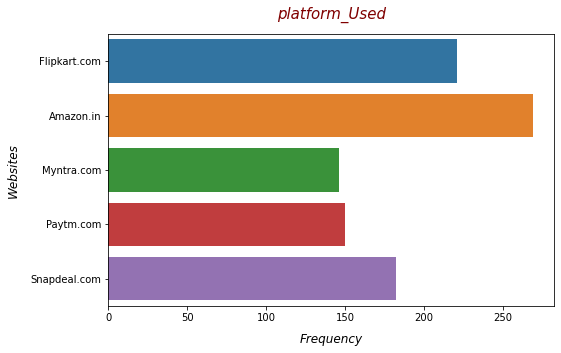

------------------------------------------------------------------------------------------


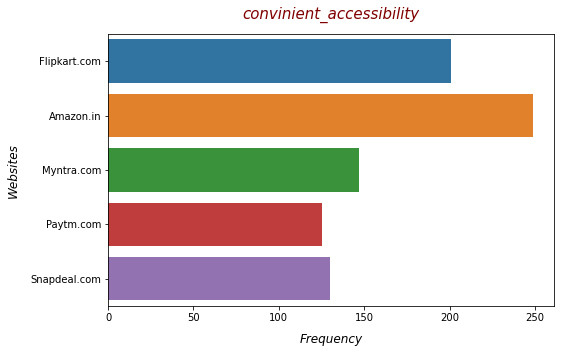

------------------------------------------------------------------------------------------


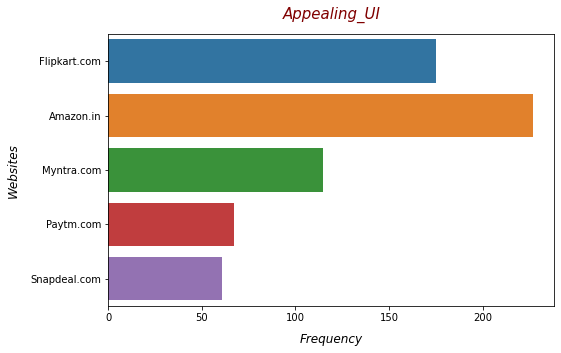

------------------------------------------------------------------------------------------


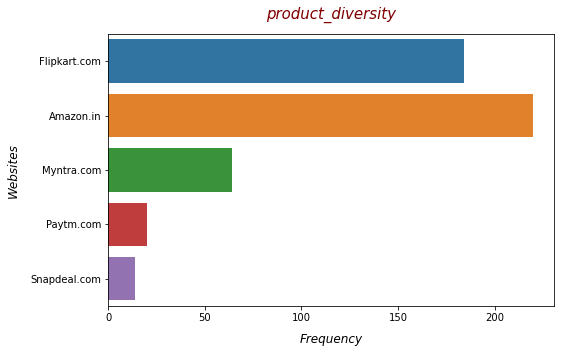

------------------------------------------------------------------------------------------


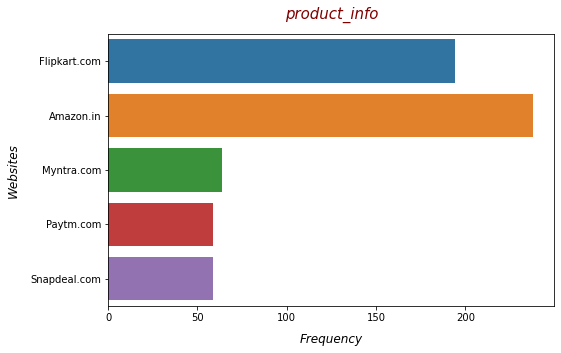

------------------------------------------------------------------------------------------


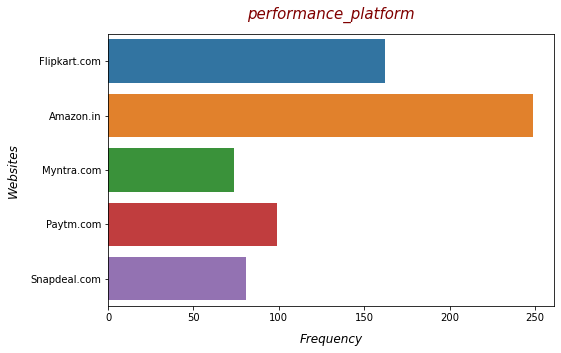

------------------------------------------------------------------------------------------


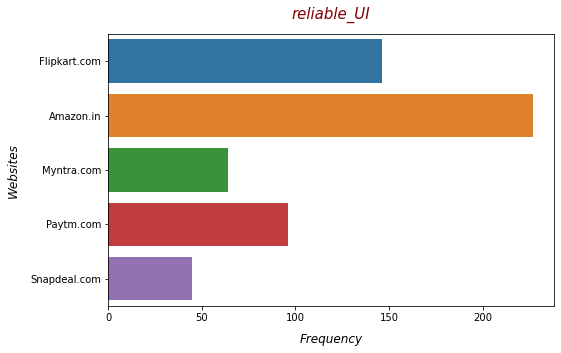

------------------------------------------------------------------------------------------


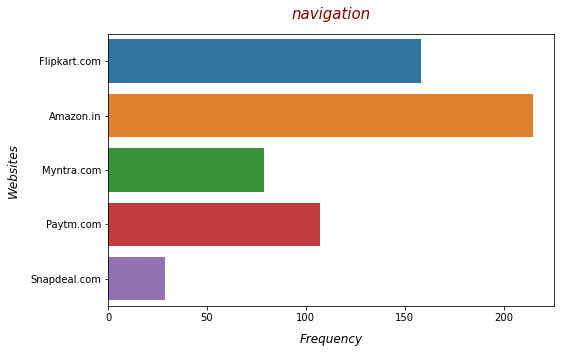

------------------------------------------------------------------------------------------


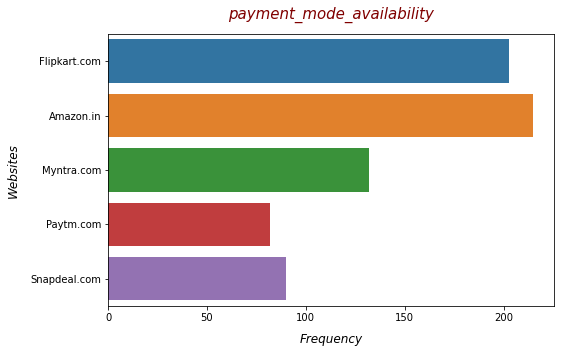

------------------------------------------------------------------------------------------


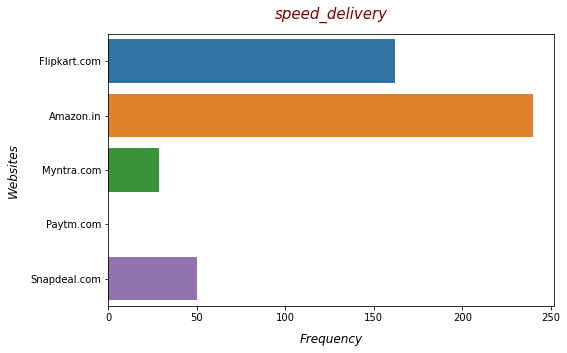

------------------------------------------------------------------------------------------


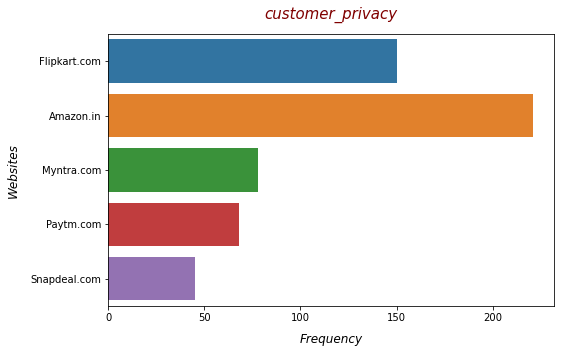

------------------------------------------------------------------------------------------


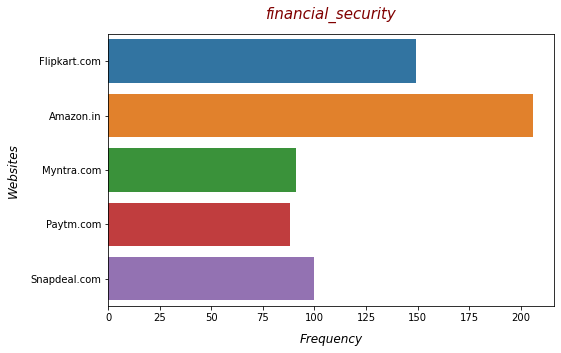

------------------------------------------------------------------------------------------


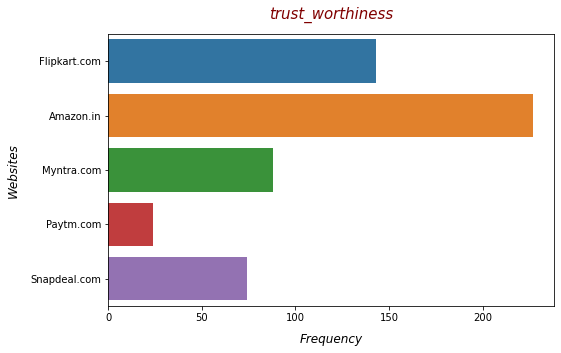

------------------------------------------------------------------------------------------


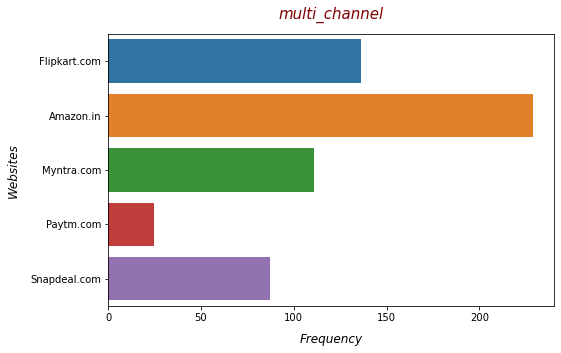

------------------------------------------------------------------------------------------


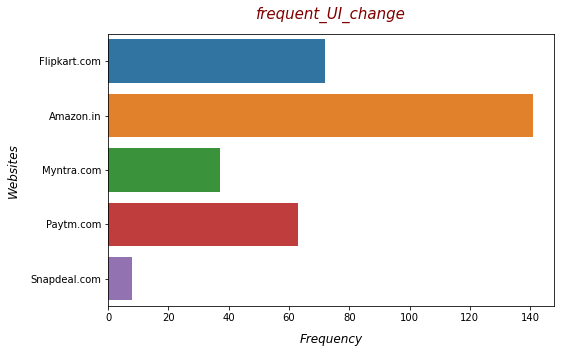

------------------------------------------------------------------------------------------


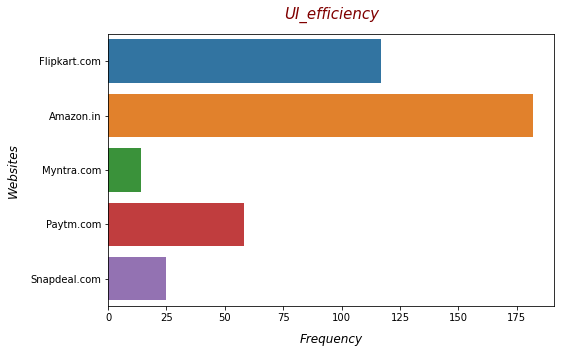

------------------------------------------------------------------------------------------


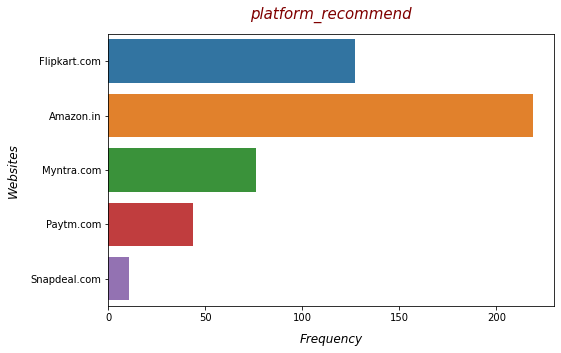

------------------------------------------------------------------------------------------


In [25]:
barplot(pos_fback)

#### After the graphical analysis, we find that in the positive feedback provided by the online retailers, " Amazon.com & Flipkart.com " are the most prefered applications.

<AxesSubplot:xlabel='Frequency', ylabel='Websites'>

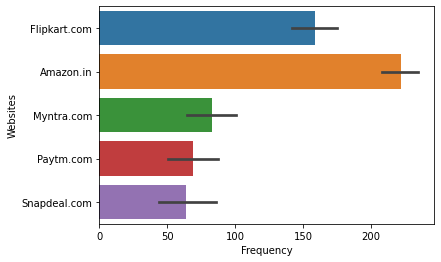

In [26]:
sns.barplot(x='Frequency',y='Websites',data=pos_fback)

#### The most preferred application by online retailers is "Amazon.in" ,while the least prefered application is "Snapdeal.com".

In [27]:
amazon =[]
snapdeal =[]
flipkart =[]
myntra = []
paytm = []

In [28]:
snapdeal.append(sum(pos_fback.sort_values(by='Websites',ascending=False).iloc[0:17,2]))
paytm.append(sum(pos_fback.sort_values(by='Websites',ascending=False).iloc[17:34,2]))
myntra.append(sum(pos_fback.sort_values(by='Websites',ascending=False).iloc[34:51,2]))
flipkart.append(sum(pos_fback.sort_values(by='Websites',ascending=False).iloc[51:68,2]))
amazon.append(sum(pos_fback.sort_values(by='Websites',ascending=False).iloc[68:85,2]))

In [29]:
neg_fback = feedback(negative_fback)
neg_fback

,Features,Websites,Frequency,Percentage of users
0,slow_login_time,Flipkart.com,103,38.29
1,slow_login_time,Amazon.in,135,50.19
2,slow_login_time,Myntra.com,35,13.01
3,slow_login_time,Paytm.com,77,28.62
4,slow_login_time,Snapdeal.com,67,24.91
5,slow_display_time,Flipkart.com,94,34.94
6,slow_display_time,Amazon.in,126,46.84
7,slow_display_time,Myntra.com,74,27.51
8,slow_display_time,Paytm.com,28,10.41
9,slow_display_time,Snapdeal.com,92,34.20


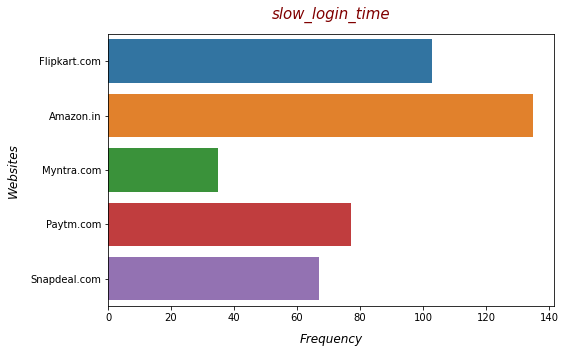

------------------------------------------------------------------------------------------


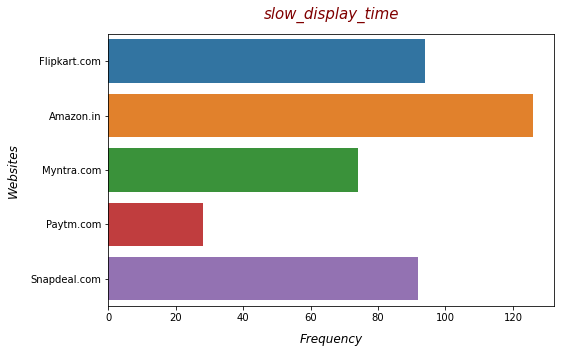

------------------------------------------------------------------------------------------


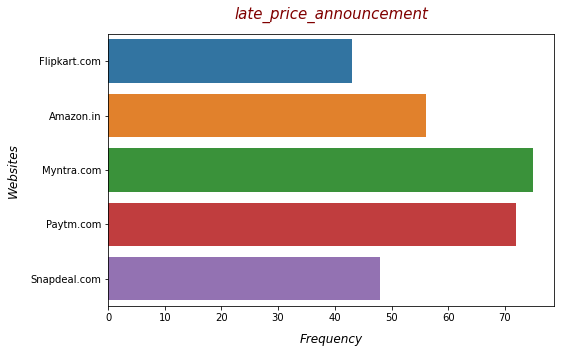

------------------------------------------------------------------------------------------


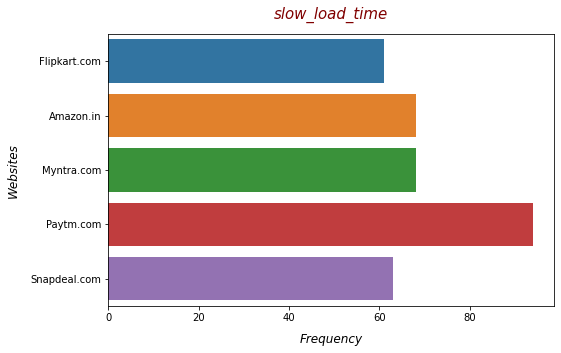

------------------------------------------------------------------------------------------


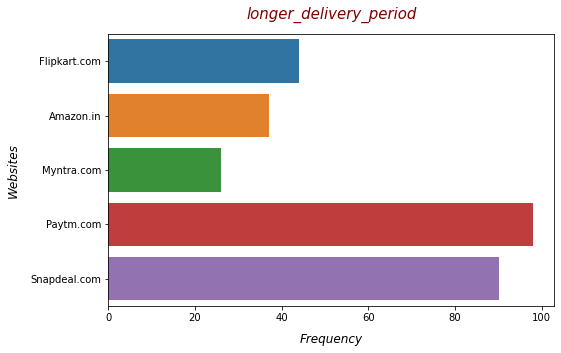

------------------------------------------------------------------------------------------


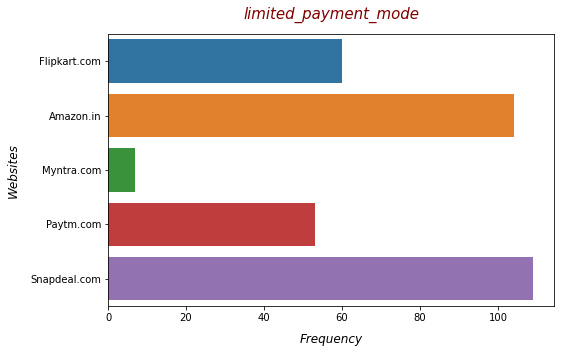

------------------------------------------------------------------------------------------


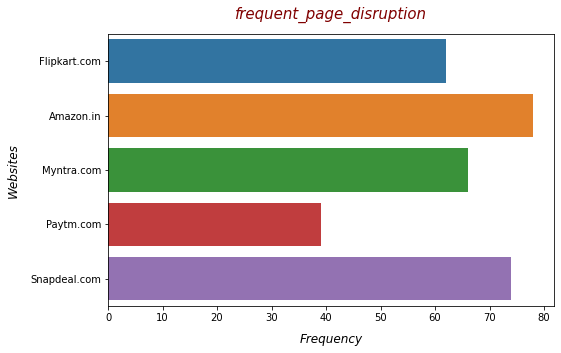

------------------------------------------------------------------------------------------


In [30]:
barplot(neg_fback)

Observations of negative feedback of websites :-
    1. Slow Login time: Amazon.in(slowest), Myntra.com(fast)
    2. Slow Display time:Amazon.in(slow), Patym.com(Fast)
    3. Late price Announcement:Myntra.com(late),Flipkart(earliest)
    4. Page Loading time: Paytm.com(slowest),Flipkart & Snapdeal (fast)
    5. Longer delivery period: Paytm.com(slow),Myntra.com(fast) 
    6. Limited payment mode seen most in Snapdeal.com and least in Myntra.com
    7. Frequent Page Disruption are in most in Amazon.in and least in Paytm.com 

<AxesSubplot:xlabel='Frequency', ylabel='Websites'>

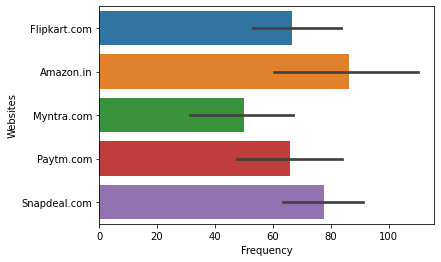

In [31]:
sns.barplot(x='Frequency',y='Websites',data=neg_fback)

#### Amazon.in at the top in negative feedbacks and Myntra.com is with least negative feedbacks.

In [32]:
snapdeal.append(sum(neg_fback.sort_values(by='Websites',ascending=False).iloc[0:7,2]))
paytm.append(sum(neg_fback.sort_values(by='Websites',ascending=False).iloc[7:14,2]))
myntra.append(sum(neg_fback.sort_values(by='Websites',ascending=False).iloc[14:21,2]))
flipkart.append(sum(neg_fback.sort_values(by='Websites',ascending=False).iloc[21:28,2]))
amazon.append(sum(neg_fback.sort_values(by='Websites',ascending=False).iloc[28:35,2]))

In [33]:
amazon.append(sum(amazon))
flipkart.append(sum(flipkart))
myntra.append(sum(myntra))
snapdeal.append(sum(snapdeal))
paytm.append(sum(paytm))

In [34]:
amazon.append(round((3774/4378)*100,2))
flipkart.append(round((2700/3167)*100,2))
myntra.append(round((1091/1636)*100,2))
snapdeal.append(round((1175/1636)*100,2))
paytm.append(round((1409/1760)*100,2))

In [35]:
feedbacks = pd.DataFrame({'Amazon':amazon,'Flipkart':flipkart,'snapdeal':snapdeal,'paytm':paytm,'Myntra':myntra},index=['Positive','Negative','Total','Positive % age'])
feedbacks

,Amazon,Flipkart,snapdeal,paytm,Myntra
Positive,3774.0,2700.00,1091.00,1175.00,1409.00
Negative,604.0,467.00,543.00,461.00,351.00
Total,4378.0,3167.00,1634.00,1636.00,1760.00
Positive % age,86.2,85.25,71.82,80.06,66.69


<AxesSubplot:>

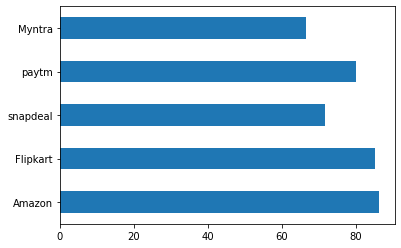

In [36]:
feedbacks.iloc[3].transpose().plot(kind='barh')

Here Amazon.in and Flipkart.com are among the most prefered websites for online retailers to shop.
While Myntra is least prefered as its negative feedbacks are high as compared to others

### Conclusion

##### In accordance to our  goal to achieve customer activation & retention in E-retail, we give the individual feedback of the websites so as to achieve thier target customers.

### 1. Amazon.com

#### To be improved:

1. During promotions, try to give a disturbance free shopping experience to customers.


2. Give more payment options to customers.


3. Try to give price early during promotion.


4. Reduce the delivery time of the products.


#### Positive feedback summary:

1. Convenient to use and also a good website for shopping.


2. Fast delivery of products.


3. Availability of complete information of the products.


4. Presence of online assistance through multi-channels.


5. Reliable website or app, perceived trustworthiness.


### 2. Flipkart.com

#### To be improved:

1. During promotions, try to give a disturbance free shopping experience to customers.


2. Give more payment options to customers.


3. Try to give the price early during promotion.


4. Reduce the delivery time of the products.


5. Flipkart and Amazon almost share the same feedbacks with varying percentages as the only difference.


#### Positive feedback summary:

1. Convenient to use and also a good website for shopping.


2. Fast delivery of products.


3. Availability of complete information of the products.


4. Presence of online assistance through multi-channels.


5. Reliable website or app, perceived trustworthiness.


6. Wild variety of products to offer.

### 3. Myntra.com

#### To be improved:

1. During promotions, try to give a disturbance free shopping experience to customers.

2. Try to give the price early during promotions.

3. Reduce the delivery time of the products during promotions.

#### Positive feedback summary:

1. Convenient to use and also a good website.

2. Availability of several payment options.

3. Faster products delivery.

4. Complete information of products available.

5. Reliable website or app, perceived trustworthiness.

6. Wild variety of product to offer

### 4. Paytm.com

#### To be improved:

1. Reduce the delivery time of the products during promotions.


2. Try to give the price early during promotion.


3. During promotions, try to give a disturbance free shopping experience to customers.


4. Late declaration of price and discounts.


5. Frequent disturbance is occurring while moving from one page to another.

#### Positive feedback summary

1. Convenient to use and a good website.


2. Quickness to complete a purchase.


3. About 64% of the customers feel that either web or app is reliable.


4. Around 20% of the customers believe that paytm has a wild variety of products on offer.

### 5. Snapdeal.com

#### To be improved:

1. Reduce the delivery time of the products during promotions.


2. Try to give the price early during promotion.


3. During promotions, try to give a disturbance free shopping experience to customers.


4. Late declaration of price and discounts.


5. No one has expressed to recommend snapdeal to a contact as it has the most negative feedbacks among all other websites.

#### Positive feedback summary:

1. Convenient to use.


2. 54% of the customers are happy about the availability of financial information security.

## General suggestions and recommendations to all the e-commerce websites

1. Improve the experience of shopping for customers, as there is a lot of scope in enhancing the shopping experience to the customers using AI.


2. Contuinue giving more financial benefits like coupons, cashbacks, etc. as customers are very much attracted to it.


3. Trustworthiness and approachability through various channels is still highly rated by customers.


4. Majority of the customers are working class women and their age is between 20-40. Always bring variety of products targetting them.


5. Provide more customer friendly approach like fast delivery, complaint resolution, etc.